<a href="https://colab.research.google.com/github/nazlicanalagoz/DataScience_Uni/blob/main/5_Veri_onisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tip veri seti üzerinde VERİ ÖN İŞLEME
# seaborn ya da kaggledan indirebilirsin.
import numpy as np   #dizi ve cebirsel işlemler için
import pandas as pd  
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [ ]:
sutun_isimleri = ['Hesap','Bahşiş',"Cinsiyet","Sigara","gün","zaman","porsiyon"]
df.columns = sutun_isimleri    # sütun isimlerini değiştirme metodu
df

,Hesap,Bahşiş,Cinsiyet,Sigara,gün,zaman,porsiyon
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()  #veri setindeki öznitelikleri (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Hesap     244 non-null    float64 
 1   Bahşiş    244 non-null    float64 
 2   Cinsiyet  244 non-null    category
 3   Sigara    244 non-null    category
 4   gün       244 non-null    category
 5   zaman     244 non-null    category
 6   porsiyon  244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df.describe().T   #sadece sayısal verilerin temel istatistiki işlemini yapar

,count,mean,std,min,25%,50%,75%,max
Hesap,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
Bahşiş,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
porsiyon,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
df.tail()   #son 5 kaydı verir

,Hesap,Bahşiş,Cinsiyet,Sigara,gün,zaman,porsiyon
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
df.sample(4)  #rastgele 4 kaydı verir

,Hesap,Bahşiş,Cinsiyet,Sigara,gün,zaman,porsiyon
87,18.28,4.00,Male,No,Thur,Lunch,2
142,41.19,5.00,Male,No,Thur,Lunch,5
47,32.40,6.00,Male,No,Sun,Dinner,4
84,15.98,2.03,Male,No,Thur,Lunch,2


In [ ]:
df.shape  #veri setimizde kaç adet gözlem ve değişken olduğunu verir

(244, 7)

In [ ]:
df.isna().sum()  #boş gözlem var mı

Hesap       0
Bahşiş      0
Cinsiyet    0
Sigara      0
gün         0
zaman       0
porsiyon    0
dtype: int64

In [ ]:
df.count() #özniteliklerimizde kaç adet gözlem var

Hesap       244
Bahşiş      244
Cinsiyet    244
Sigara      244
gün         244
zaman       244
porsiyon    244
dtype: int64

In [ ]:
df['Bahşiş'] #yalnızca Bahşiş verilerini görmek istiyorum

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: Bahşiş, Length: 244, dtype: float64

In [ ]:
df['gün'].unique() #birbirinden farklı benzersiz değerler     #nunique >> kaç adet benzersiz olduğunu sayıyla belirtir

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [ ]:
# hesap bilgilerinin ortalamasını ver
df['Hesap'].mean()

19.785942622950824

In [ ]:
df['Hesap'].median()  #ortancayı verir

17.795

In [ ]:
df['Hesap'].std()   #standart sapmayı verir

8.902411954856856

In [ ]:
df['Bahşiş'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: Bahşiş, dtype: float64

In [ ]:
df.groupby(['porsiyon']).mean()    # her porsiyon için verilen bahşiş gruplaması

,Hesap,Bahşiş
porsiyon,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [ ]:
# cinsiyete göre ödenen bahşiş, hesap ve porsiyon bilgilerini inceler
df.groupby(['Cinsiyet']).describe()['Bahşiş']

,count,mean,std,min,25%,50%,75%,max
Cinsiyet,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [ ]:
df.groupby(['Cinsiyet']).mean()  #cinsiyete göre gruplandır, sayısal değelerlerin ortalamasını ver

,Hesap,Bahşiş,porsiyon
Cinsiyet,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
df['Bahşiş'].mode()  # en sık tekrar eden bahşişle

0    2.0
dtype: float64

In [ ]:
# KORELASYON   iki ya da daha fazla bağımsız öznitelik arasındaki işlişkinin varlığı hakkında bilgi verir.
df.corr()

,Hesap,Bahşiş,porsiyon
Hesap,1.000000,0.675734,0.598315
Bahşiş,0.675734,1.000000,0.489299
porsiyon,0.598315,0.489299,1.000000


In [ ]:
df[(df['Cinsiyet']=='Male') & (df['Bahşiş']>8)]

,Hesap,Bahşiş,Cinsiyet,Sigara,gün,zaman,porsiyon
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


In [ ]:
# en yüksek bahşiş veren  5 müşteri hangi gün geliyor ve sigara içiyor mu?  sıralama işlemi    AXIS=1 SE SATIRDA
df.sort_values('Bahşiş', axis=0, ascending=False).head()[['Bahşiş',"gün","Sigara"]]

,Bahşiş,gün,Sigara
170,10.00,Sat,Yes
212,9.00,Sat,No
23,7.58,Sat,No
59,6.73,Sat,No
141,6.70,Thur,No


In [ ]:
# query() sorgulama
df_filter= df.query('Bahşiş > 6 & porsiyon < 5')[['Cinsiyet','Bahşiş','porsiyon']]
df_filter

,Cinsiyet,Bahşiş,porsiyon
23,Male,7.58,4
59,Male,6.73,4
170,Male,10.00,3
183,Male,6.50,4
212,Male,9.00,4
214,Female,6.50,3


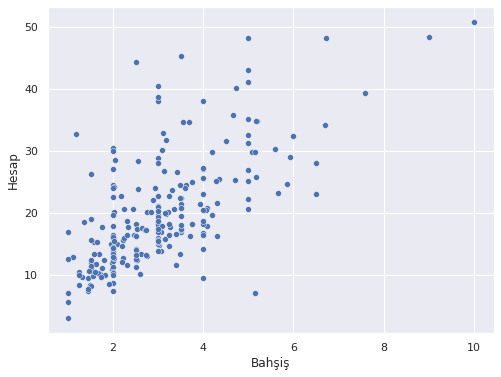

In [ ]:
 # VERİ GÖRSELLEŞTİRME
 # Hesap miktarı ile bahşiş arasındaki ilişki
 sns.set(rc={'figure.figsize':(8,6)})  # grafikleri 8x6 cm boyutuna al
 
 sns.scatterplot(x='Bahşiş', y= 'Hesap',data=df) ;      # noktalı virgül üst satırdaki yazıyı kaldırır

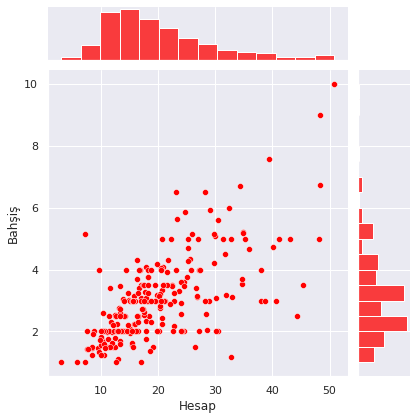

In [ ]:
#gözlem değerleri hangi aralıkta ne kadar yoğundur?
sns.jointplot(x= 'Hesap',y = 'Bahşiş',data=df, color='red')

In [ ]:
# KOVARYANS   iki değişken arasındaki ilişki hakkında bilgi verir
df.cov()

,Hesap,Bahşiş,porsiyon
Hesap,79.252939,8.323502,5.065983
Bahşiş,8.323502,1.914455,0.643906
porsiyon,5.065983,0.643906,0.904591


In [ ]:
#Korelasyon
corr=df.corr()

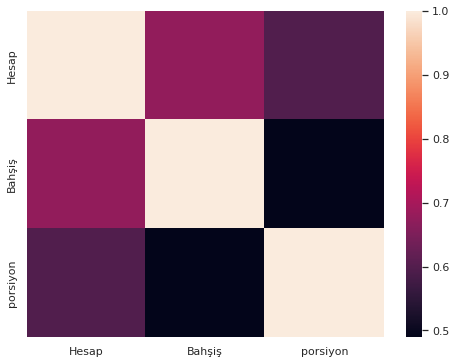

In [ ]:
# ısı haritası ile gösterme
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

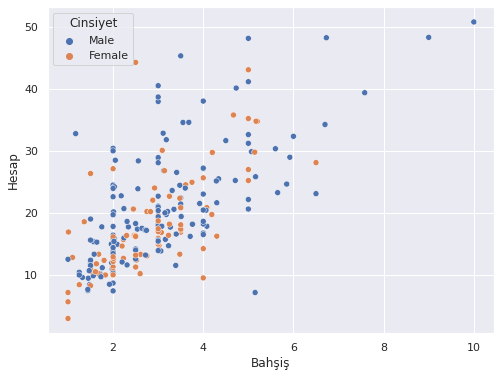

In [ ]:
# bahşiş, ödenen hesap ve cinsiyet arasındaki ilişki
sns.scatterplot(x='Bahşiş',y='Hesap',hue='Cinsiyet',data=df)   # hue >> cinsiyete göre ayırdı

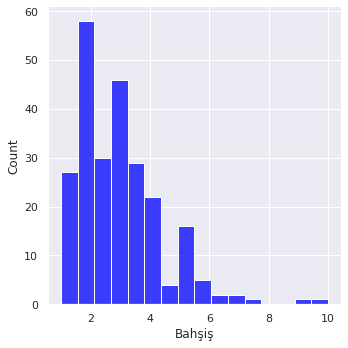

In [ ]:
# ödenen hesapların dağılımı ( HİSTOGRAM)
sns.displot(df['Bahşiş'], bins=16,color='blue')  # normal dağılım

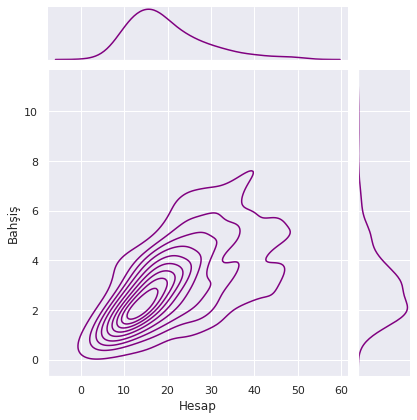

In [ ]:
# ödenen hesaplar ve bahşişlerin yoğunluğu
sns.jointplot(x=df['Hesap'], y=df['Bahşiş'],kind='kde',color='purple') # kind farklı grafik çeşitlerini kullanırsak yazabiliriz 

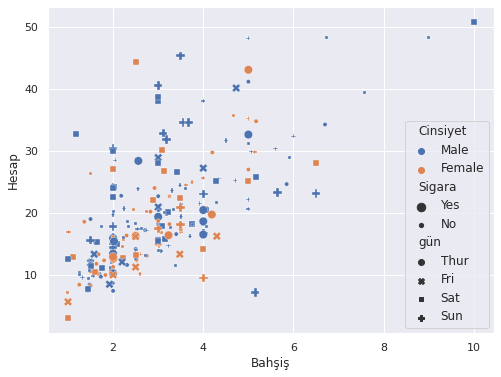

In [ ]:
sns.scatterplot(x='Bahşiş',y='Hesap',hue='Cinsiyet',size='Sigara',style='gün',data=df)   #size >> boyutuna göre değerlendirme yapar 

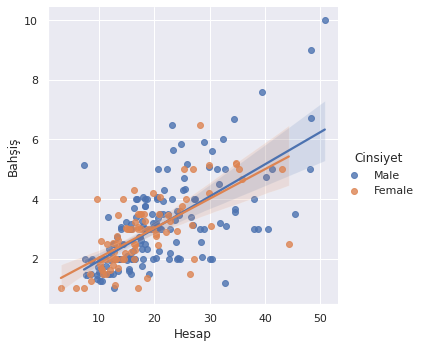

In [ ]:
sns.lmplot(x='Hesap',y='Bahşiş',data=df,hue='Cinsiyet')

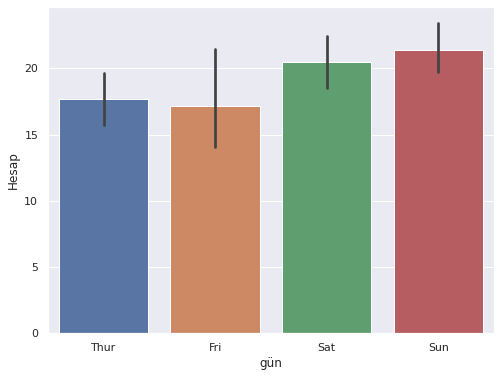

In [ ]:
# Çubuk grafik
sns.barplot(x='gün',y='Hesap',data=df)

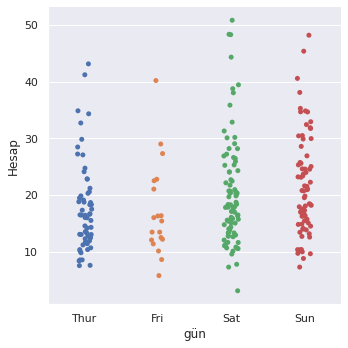

In [ ]:
sns.catplot(x='gün',y='Hesap',data=df)

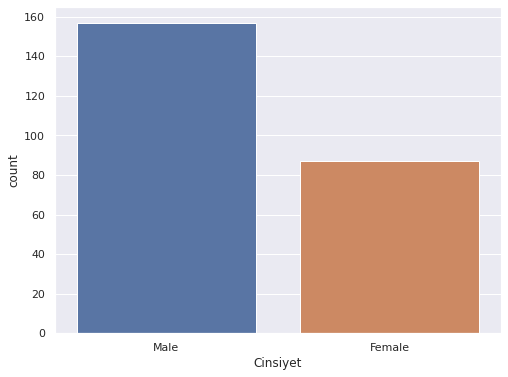

In [ ]:
sns.countplot(x='Cinsiyet',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


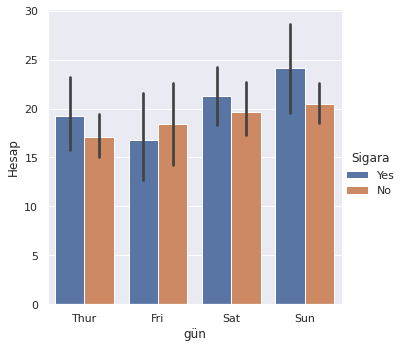

In [ ]:
sns.factorplot('gün','Hesap','Sigara',data=df, kind='bar')

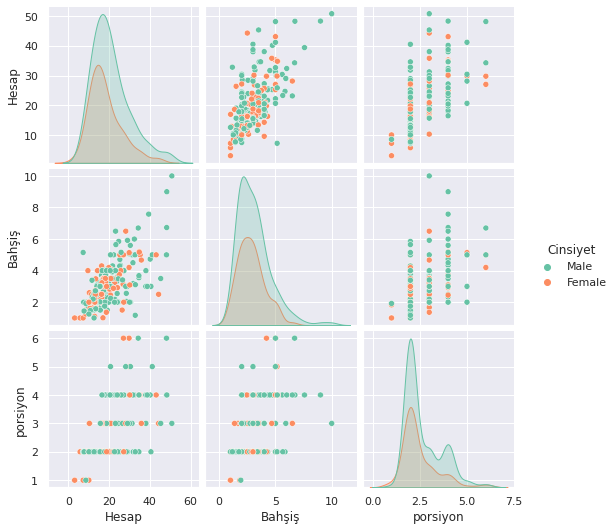

In [ ]:
sns.pairplot(df, hue='Cinsiyet',palette='Set2')

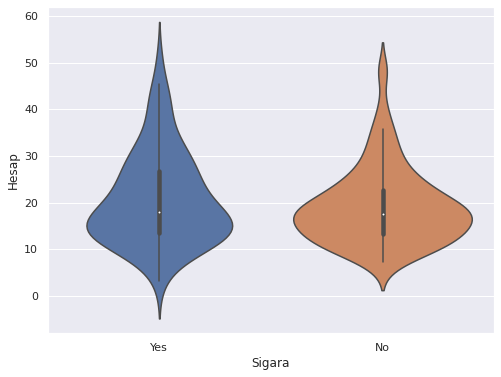

In [ ]:
# Keman grafik
sns.violinplot(x='Sigara',y='Hesap',data=df)